# データハンドリングの練習
Create: 2018/02/07<br>
Author: drsenri (H. Shibata)

## 1. はじめに
このノートブックでは、データの可視化や加工 (データハンドリングを呼びます) の方法を学びます。<br>
ダミーデータでは、numpyやpandasの「生きた」使い方が掴みづらい部分がありましたが、今回はより実践的な内容になります。

## 2. ライブラリのインポートと初期設定
前回同様にnumpy, pandasをインポートします。<br>
さらに、サンプルデータのためにsklearn.datasetsもインポートし、マジックコマンドもここで実行しておきます。<br>
余談ですが、sklearnは機械学習のためのインターフェースを提供するライブラリで、今後もよく登場します。

In [1]:
import numpy as np
import pandas as pd
import sklearn.datasets
%matplotlib inline

## 3.　サンプルデータの読み込み
sklearn.datasetsから、irisをロードします。<br>
irisはアヤメの計測データで、練習問題でよく使用されます。<br>
読み込んだ後、DataFrameに変換します。<br>
4行目のコードは、iris_yをarrayからDataFrameに変換し、iris_xとiris_yをconcatで横方向に連結しています。<br>
詳しい挙動を理解するには、iris_xとiris_yのデータを確認してみましょう。

In [2]:
iris = sklearn.datasets.load_iris()
iris_x = pd.DataFrame(iris.data, columns=iris.feature_names) # アヤメの計測データ
iris_y = iris.target # アヤメの品種
iris_df = pd.concat(objs = (iris_x, pd.DataFrame(iris_y, columns=["target"])), axis=1)

## 4. データの可視化
データをロードしたら、まずデータの可視化を行います。<br>
可視化とは、サイズはどの程度か、どのような項目があるか、平均は、偏りは、……と、データの性質を分析することです。<br>
データの癖を掴むことが分析の品質に強く影響するため、注意深く行う必要があります。<br>
観点は様々ですが、一例として以下を挙げます。<br>
- データの見た目 (文字通りの「見た目」。分析は魔法ではなく、観察に基づくアートです)
- データの大きさ (何行、何列あるか)
- 欠損値の有無 (欠損値とは、不明な値を指します。今回のサンプルデータには存在しませんが、実際のデータでは頻出し、処理方法で分析の品質が変わってきます)
- 基本統計量 (平均、標準偏差、最大値、最小値などを指します)
- ヒストグラム (データの分布の図です。基本統計量をより視覚的に把握できます)
- 項目同士の相関 (相関が強い項目の組み合わせが存在する場合、分析を誤る危険性があります)

In [3]:
iris_df.head() # 先頭5行を抜き出す

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
iris_df.shape # データの大きさ

(150, 5)

In [11]:
iris_df.isnull().sum() # 欠損の確認

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [6]:
iris_df.describe() # 列ごとの基本統計量

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [14]:
iris_df.mean() # 平均値のみ欲しい場合、meanメソッドを使う (返り値はpd.Series)

sepal length (cm)    5.843333
sepal width (cm)     3.054000
petal length (cm)    3.758667
petal width (cm)     1.198667
target               1.000000
dtype: float64

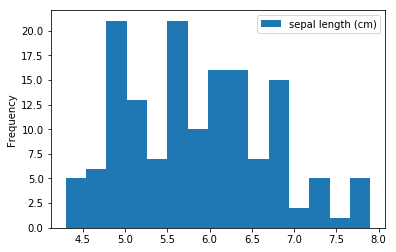

In [41]:
iris_df[["sepal length (cm)"]].plot.hist(bins = 15) # 'sepal length (cm)' の散布図

In [7]:
iris_df.corr() # 相関係数を出力する (デフォルトはpearson)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.109369,0.871754,0.817954,0.782561
sepal width (cm),-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal length (cm),0.871754,-0.420516,1.000000,0.962757,0.949043
petal width (cm),0.817954,-0.356544,0.962757,1.000000,0.956464
target,0.782561,-0.419446,0.949043,0.956464,1.000000


## 5. 分析する

### 5-1. 品種と他のデータの関係性
相関係数のテーブルを見ると、